# Q1

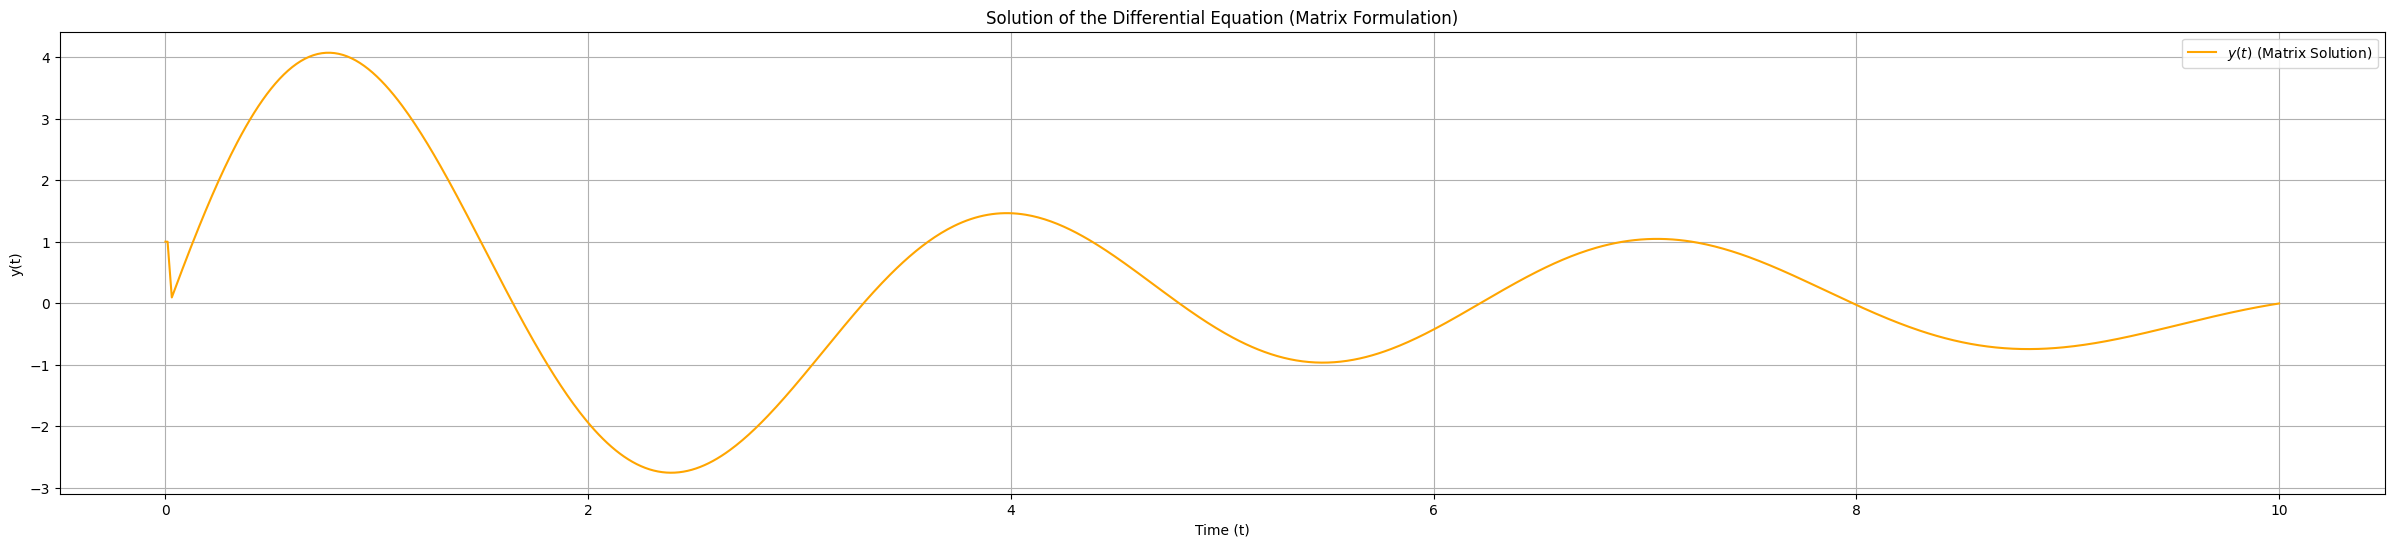

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

# Parameters
A = 1          # Initial condition y(0)
a = 0.5        
omega = 2      
omega1 = 1     
t_initial = 0  
t_final = 10   
N = 1000       # Number of steps

# Time step and array
dt = (t_final - t_initial) / N
t = np.linspace(t_initial, t_final, N+1)

# Matrix coefficients for finite difference formulation
alpha = 1 - a * dt / 2  # Lower diagonal coefficient
beta = (omega * dt) ** 2 - 2 # Main diagonal coefficient
gamma = 1 + a * dt / 2  # Upper diagonal coefficient

e_1 = -alpha * A

# Construct the right-hand side vector b
b = np.cos(omega1 * (t + 2 * dt)) * dt ** 2

# Adjust for boundary conditions
b[0] += e_1 # Enforce y(1) = A

# Construct the banded matrix
ab = np.zeros((3, N))
ab[0, :N-1] = [gamma] * (N - 1)  # Upper diagonal
ab[1, :] = [beta] * N          # Main diagonal
ab[2, 1:] = [alpha] * (N - 1) # Lower diagonal

# Solve the tridiagonal system
y_matrix_solution = solve_banded((1, 1), ab,  b[:-1])


# Shift the solution forward by 2 steps and set the first two values
y_matrix_solution = np.insert(y_matrix_solution, 0, [A, A])  # Add y[0] = A and y[1] = A at the start

# Adjusted Plot
plt.figure(figsize=(30, 6))
plt.plot(t, y_matrix_solution[:len(t)], label=r'$y(t)$ (Matrix Solution)', color='orange')  # Match lengths
plt.title("Solution of the Differential Equation (Matrix Formulation)")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
plt.legend()
plt.grid()
plt.show()



# Q2

Solving Laplace's Equation: 100%|████████████████████████████████████████████████| 10000/10000 [21:32<00:00,  7.74it/s]


Did not converge within the maximum number of iterations.


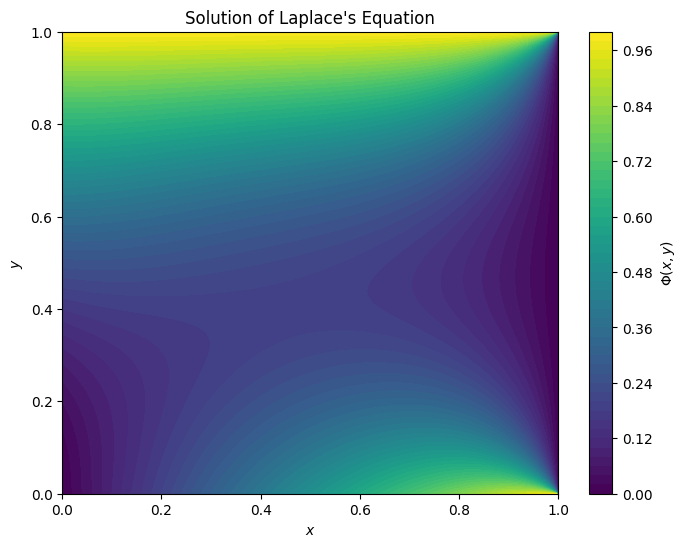

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


L = 1.0  # Physical size of the domain
nx, ny = 300, 300  # Number of grid points along x and y

# Set grid spacing
dx = L / (nx - 1)
dy = L / (ny - 1)

# Create arrays for the solution
phi = np.zeros((nx, ny))

# Boundary conditions
for i in range(nx):
    phi[0, i] = (i * dy) ** 2  # Φ(0, y) = y^2
    phi[i, 0] = i * dx  # Φ(x, 0) = x
    phi[i, ny - 1] = 1  # Φ(x, L) = 1
    phi[nx - 1, i] = 0  # Φ(L, y) = 0

# Iterative solver using relaxation method
max_iter = 10000
convergence_tol = 1e-6  # Convergence tolerance

for iteration in tqdm(range(max_iter), desc="Solving Laplace's Equation"):
    phi_old = phi.copy()

    # Update the interior points
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            phi[i, j] = 0.25 * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1])

    # Check for convergence
    error = np.linalg.norm(phi - phi_old, ord=np.inf)
    if error < convergence_tol:
        print(f"Converged after {iteration} iterations.")
        break
else:
    print("Did not converge within the maximum number of iterations.")

# Plot the solution
x = np.linspace(0, L, nx)
y = np.linspace(0, L, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi, 50, cmap='viridis')
plt.colorbar(label='$\u03A6(x, y)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Solution of Laplace\'s Equation')
plt.show()


# Q3

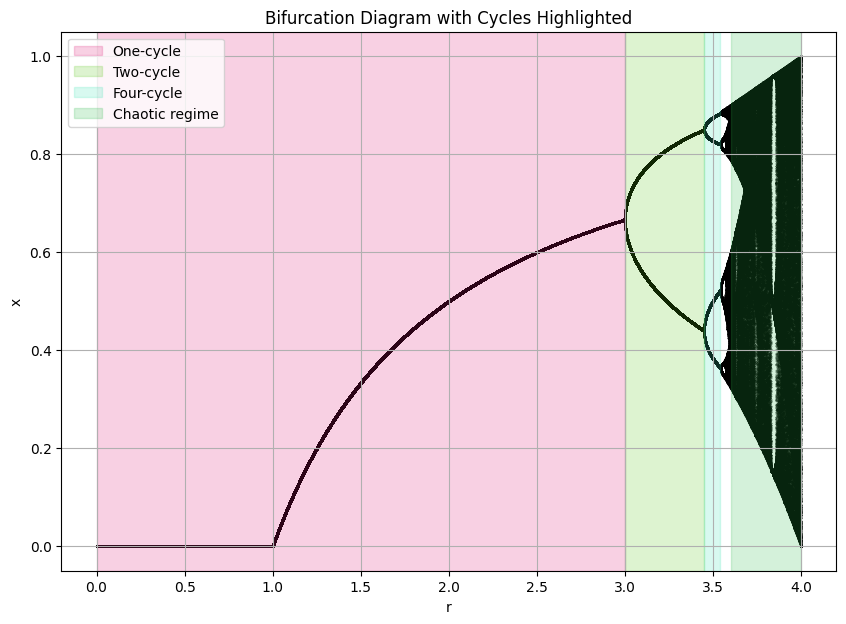

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_iterations = 1000  # Total iterations
n_last = 100  # Points to plot in the bifurcation diagram
r_values = np.linspace(0, 4.0, 20000)
x0 = 0.5  # Initial condition

# Create the bifurcation diagram
bifurcation_x = []
bifurcation_r = []

for r in r_values:
    x = x0
    for _ in range(n_iterations):
        x = r * x * (1 - x)
        # Save only the last n_last points for the bifurcation diagram
        if _ >= n_iterations - n_last:
            bifurcation_x.append(x)
            bifurcation_r.append(r)


# Highlight different regions (one-cycle, two-cycle, four-cycle, chaotic regime)
regions = {
    "One-cycle": (0, 3.0),
    "Two-cycle": (3.0, 3.45),
    "Four-cycle": (3.45, 3.54),
    "Chaotic regime": (3.6, 4.0)
}

# Visualize regions
plt.figure(figsize=(10, 7))
plt.scatter(bifurcation_r, bifurcation_x, s=0.1, color='black', alpha=0.5)

for region, (start, end) in regions.items():
    plt.axvspan(start, end, color=np.random.rand(3,), alpha=0.2, label=region)

plt.title("Bifurcation Diagram with Cycles Highlighted")
plt.xlabel("r")
plt.ylabel("x")
plt.legend()
plt.grid(True)
plt.show()


# Q4

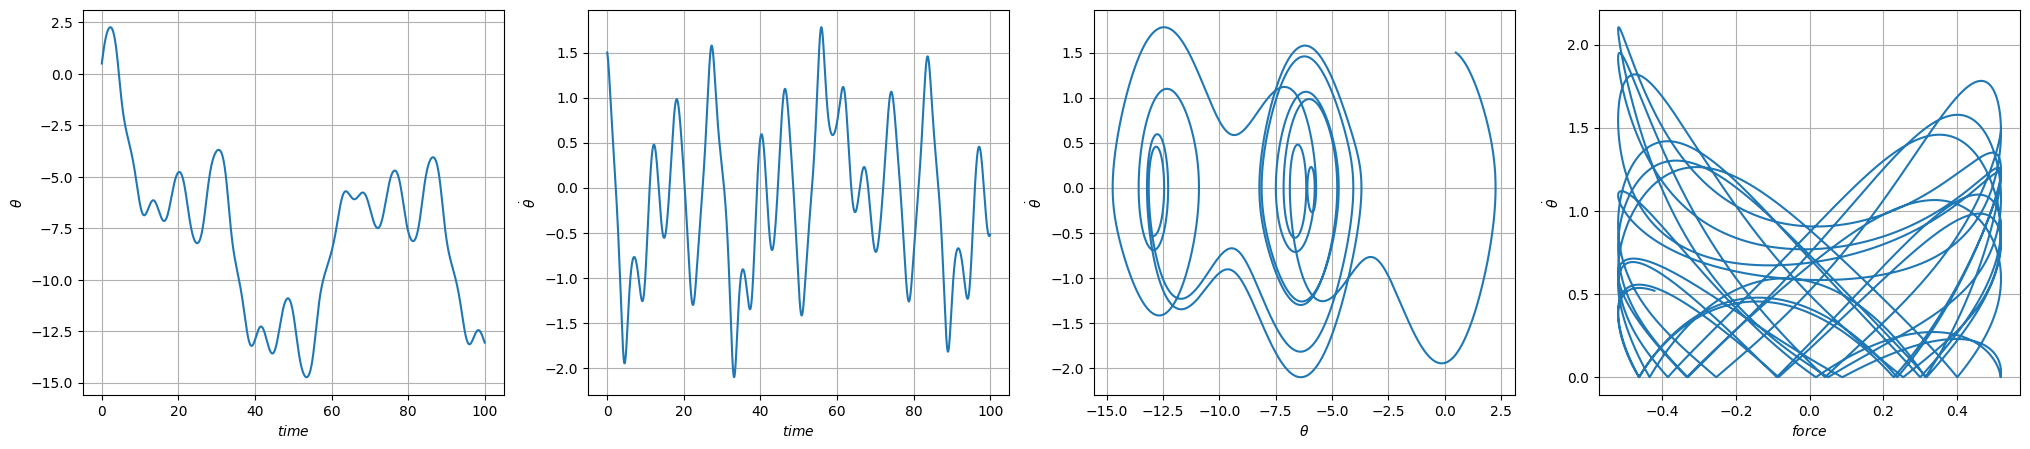

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
alpha = 0.2
w = 0.666
w_0 = 1
theta_0 = 0.5
theta_dot_0 = 1.5
f = 0.52
delta_t = 0.001
N = 100000

# Time array
t = np.linspace(0, N * delta_t, N+1)

# Preallocate arrays
theta_list = np.zeros(N+1)
theta_dot_list = np.zeros(N+1)
f_list = f * np.cos(w * t)

# Initial conditions
theta_list[0] = theta_0
theta_dot_list[0] = theta_dot_0

# Euler method
for i in range(N):
    theta_list[i+1] = theta_dot_list[i] * delta_t + theta_list[i]
    theta_dot_list[i+1] = (-(w_0**2) * np.sin(theta_list[i]) 
                           - alpha * theta_dot_list[i] 
                           + f_list[i]) * delta_t + theta_dot_list[i]

# Plot results
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

# Plot 1: Theta vs. Time
axs[0].plot(t, theta_list)
axs[0].grid()
axs[0].set(xlabel=r'$time$', ylabel=r'$\theta$')

# Plot 2: Angular Velocity vs. Time
axs[1].plot(t, theta_dot_list)
axs[1].grid()
axs[1].set(xlabel=r'$time$', ylabel=r'$\dot{\theta}$')

# Plot 3: Phase Diagram (Theta vs. Angular Velocity)
axs[2].plot(theta_list, theta_dot_list)
axs[2].grid()
axs[2].set(xlabel=r'$\theta$', ylabel=r'$\dot{\theta}$')

# Plot 4: Force vs. Angular Velocity
axs[3].plot(f_list, np.abs(theta_dot_list))
axs[3].grid()
axs[3].set(xlabel=r'$force$', ylabel=r'$\dot{\theta}$')

plt.show()


# Q5

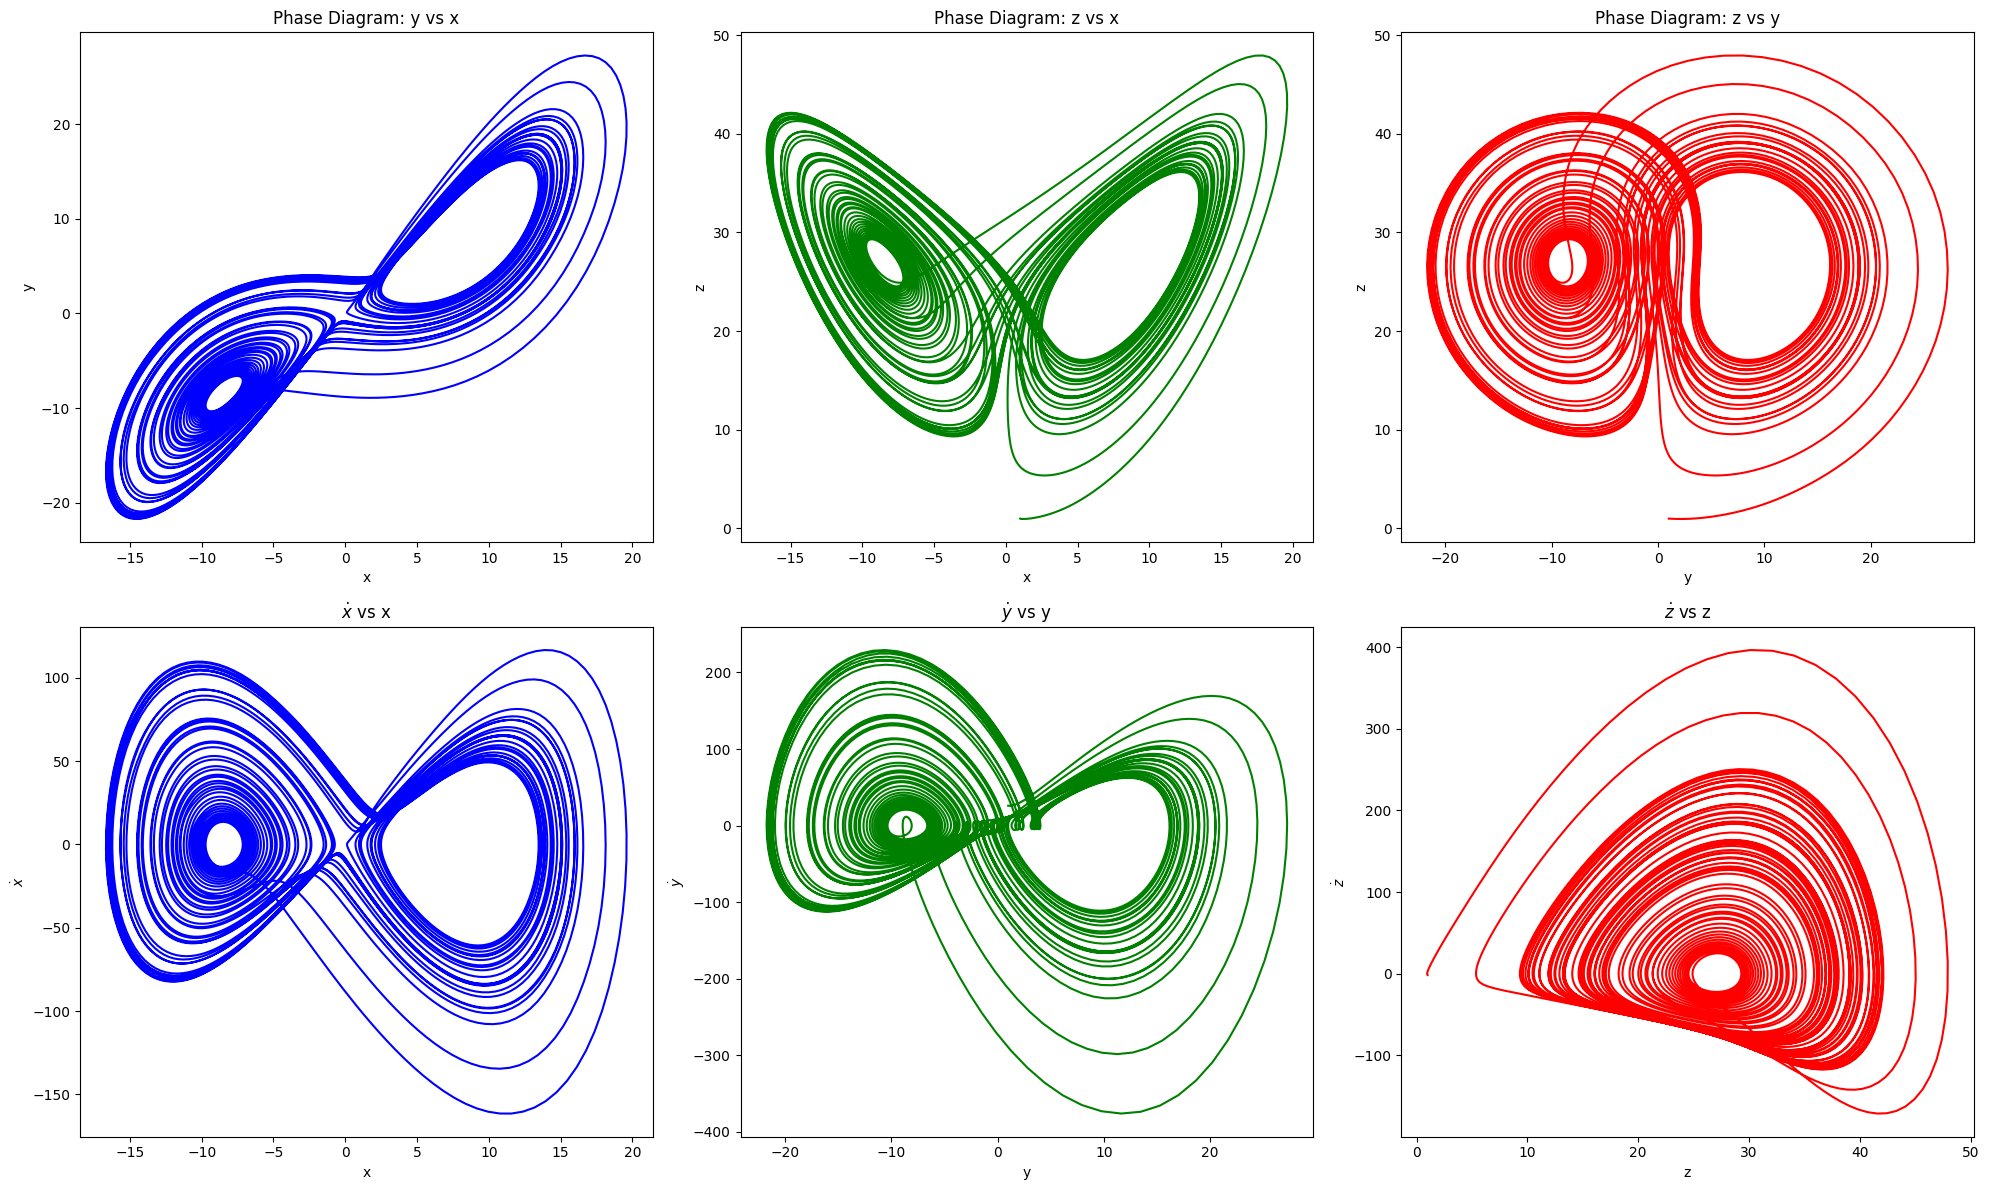

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Lorenz system
def lorenz(t, state, sigma=10, rho=28, beta=8/3):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Solve the system
t_span = (0, 50)
t_eval = np.linspace(0, 50, 10000)  # Time points to evaluate the solution
initial_state = [1.0, 1.0, 1.0]  # Initial conditions

solution = solve_ivp(lorenz, t_span, initial_state, t_eval=t_eval)

# Extract solution components
x, y, z = solution.y

# Calculate derivatives for each time point
derivatives = np.array([lorenz(t, [x[i], y[i], z[i]]) for i, t in enumerate(solution.t)])
dx_dt, dy_dt, dz_dt = derivatives.T  # Transpose to get individual derivatives


fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Plot phase diagrams for x-y, x-z, y-z
# Phase diagram: y vs x
axes[0][0].plot(x, y, color='b')
axes[0][0].set_title("Phase Diagram: y vs x")
axes[0][0].set_xlabel("x")
axes[0][0].set_ylabel("y")

# Phase diagram: z vs x
axes[0][1].plot(x, z, color='g')
axes[0][1].set_title("Phase Diagram: z vs x")
axes[0][1].set_xlabel("x")
axes[0][1].set_ylabel("z")

# Phase diagram: z vs y
axes[0][2].plot(y, z, color='r')
axes[0][2].set_title("Phase Diagram: z vs y")
axes[0][2].set_xlabel("y")
axes[0][2].set_ylabel("z")


# Plot dx/dt vs x, dy/dt vs y, dz/dt vs z
# dx/dt vs x
axes[1][0].plot(x, dx_dt, color='blue')
axes[1][0].set_title("$\dot{x}$ vs x")
axes[1][0].set_xlabel("x")
axes[1][0].set_ylabel("$\dot{x}$")

# dy/dt vs y
axes[1][1].plot(y, dy_dt, color='green')
axes[1][1].set_title("$\dot{y}$ vs y")
axes[1][1].set_xlabel("y")
axes[1][1].set_ylabel("$\dot{y}$")

# dz/dt vs z
axes[1][2].plot(z, dz_dt, color='red')
axes[1][2].set_title("$\dot{z}$ vs z")
axes[1][2].set_xlabel("z")
axes[1][2].set_ylabel("$\dot{z}$")

plt.tight_layout()
plt.show()
